In [1]:
#Importing Linear Regression Module for predicting the stock prices
from sklearn.linear_model import LinearRegression

In [2]:
#Importing pandas for data visualization
import pandas as pd 
#Importing numpy for error analysis
import numpy as np 
#Importing  matplotlib.pyplot for plotiing graphs
import matplotlib.pyplot as plt 
import seaborn as sns

import fix_yahoo_finance as yf

c:\users\gautam\appdata\local\programs\python\python39\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [3]:
#Apple stock prices 
Df = pd.read_csv("C:/Users/Gautam/stocks.csv")
Df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [4]:
Df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [5]:
#Data cleaning (Data cleaned)
Df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

[*********************100%***********************]  1 of 1 completed


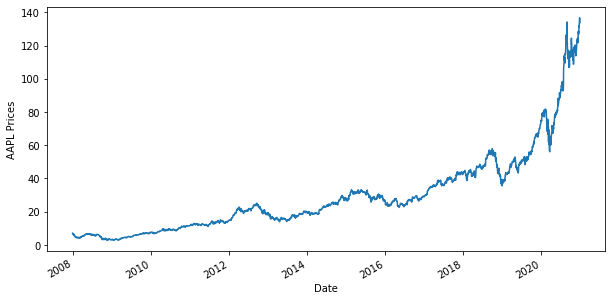

In [6]:
Df = yf.download('AAPL','2008-01-01','2020-12-31')
 
Df=Df[['Close']] 
 
Df= Df.dropna() 
 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("AAPL Prices")
plt.show()

In [7]:
Df

,Close
Date,
2007-12-31,7.074286
2008-01-02,6.958571
2008-01-03,6.961786
2008-01-04,6.430357
2008-01-07,6.344286
...,...
2020-12-23,130.960007
2020-12-24,131.970001
2020-12-28,136.690002


In [8]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2008-01-14,6.310833,6.535317
2008-01-15,6.303452,6.458730
2008-01-16,6.196548,6.356349
2008-01-17,6.041191,6.216310
2008-01-18,5.828214,6.140278


In [9]:
X.describe()

,S_3,S_9
count,3265.000000,3265.000000
mean,29.308766,29.193639
std,24.661822,24.462514
min,2.897143,3.036349
25%,12.242381,12.171309
50%,23.700476,23.740555
75%,39.126667,39.086389
max,134.510000,130.863334


In [10]:
y = Df['Close']
y.head()

Date
2008-01-14    6.385000
2008-01-15    6.037143
2008-01-16    5.701429
2008-01-17    5.746071
2008-01-18    5.762857
Name: Close, dtype: float64

In [11]:
t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
Y_test = y[t:]

In [12]:
linear = LinearRegression().fit(X_train,y_train)

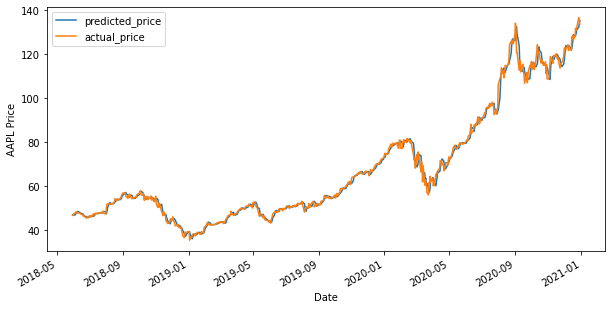

In [13]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=Y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
Y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

df=pd.read_csv('C:/Users/Gautam/Accenture_stock_history.csv')

<AxesSubplot:>

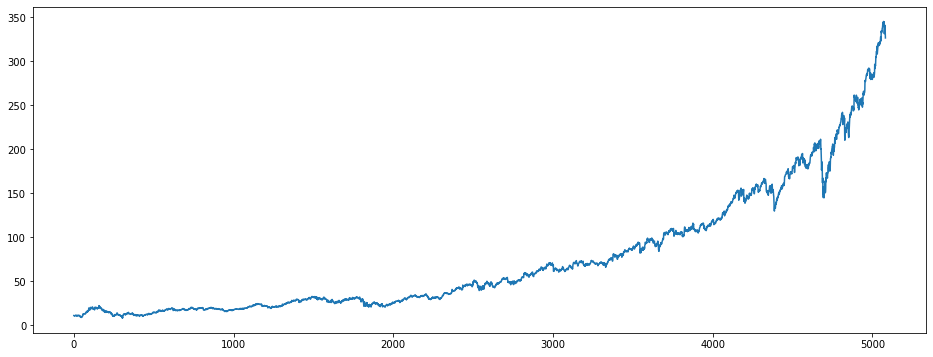

In [15]:
df['Date']=pd.to_datetime(df.Date)
df['Open'].plot(figsize=(16,6))

C:\Users\Gautam\AppData\Local\Temp/ipykernel_17908/2699161143.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


[Text(730000.0, 0, '1999-09-03'),
 Text(731000.0, 0, '2002-05-30'),
 Text(732000.0, 0, '2005-02-23'),
 Text(733000.0, 0, '2007-11-20'),
 Text(734000.0, 0, '2010-08-16'),
 Text(735000.0, 0, '2013-05-12'),
 Text(736000.0, 0, '2016-02-06'),
 Text(737000.0, 0, '2018-11-02'),
 Text(738000.0, 0, '2021-07-29'),
 Text(739000.0, 0, '2024-04-24')]

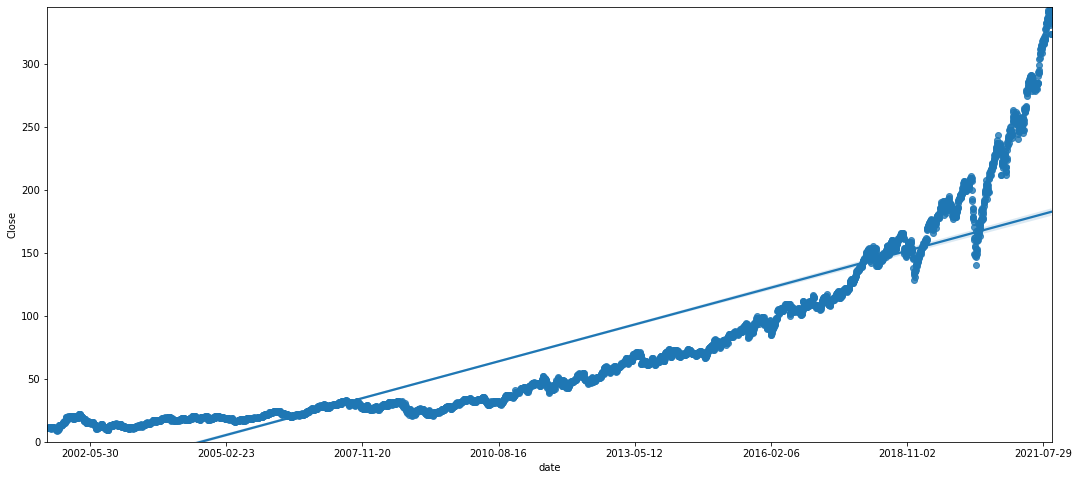

In [16]:
dfp=df
from datetime import date
import seaborn
plt.figure(figsize=(18,8))
dfp['date_ordinal'] = pd.to_datetime(dfp['Date']).apply(lambda date: date.toordinal())
ax = seaborn.regplot(
    data=dfp,
    x='date_ordinal',
    y='Close',
)
# Tighten up the axes for prettiness
ax.set_xlim(dfp['date_ordinal'].min() - 1, dfp['date_ordinal'].max() + 1)
ax.set_ylim(0, dfp['Close'].max() + 1)
ax.set_xlabel('date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

In [17]:
x=df[['Low','Open','High','Volume']]
y=df['Close']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x ,y ,random_state = 1) 
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [18]:
y_test.shape

(1271,)

In [19]:
x_test.shape

(1271, 4)

In [20]:
y_train.shape

(3811,)

In [21]:
x_train.shape

(3811, 4)

In [22]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
predicted=regressor.predict(x_test)

In [24]:
print(x_test)

             Low        Open        High   Volume
3541   92.700621   93.186154   93.590761  1952300
538    16.181474   16.665058   16.761776  4702400
4325  160.973815  161.193278  165.964286  3112800
5042  315.850006  318.019989  319.190002  1448300
3667   89.343494   90.534018   91.897209  2740200
...          ...         ...         ...      ...
2653   47.701165   47.759135   48.239460  2729700
3223   68.978872   69.250965   69.874135  1705800
3219   68.469819   68.610248   69.382633  2607600
1635   24.550387   25.642884   25.642884  4780100
1877   24.651869   25.683590   26.613700  5442100

[1271 rows x 4 columns]


In [25]:
predicted.shape


(1271,)

In [26]:
dfr = pd.DataFrame({'Actual':y_test,'Predicted':predicted})
print(dfr)


          Actual   Predicted
3541   93.383965   93.196647
538    16.761776   16.404226
4325  162.261993  164.486047
5042  316.769989  317.397493
3667   89.534340   90.626074
...          ...         ...
2653   47.750854   48.130067
3223   69.207077   69.560809
3219   69.189537   69.133880
1635   25.442848   24.827122
1877   26.402666   25.558132

[1271 rows x 2 columns]


In [27]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date_ordinal
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0,730685
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0,730686
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0,730689
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0,730690
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0,730691
...,...,...,...,...,...,...,...,...,...
5077,2021-09-23,337.619995,344.739990,337.130005,343.000000,4543400,0.0,0,738056
5078,2021-09-24,340.679993,342.880005,337.720001,339.230011,2035900,0.0,0,738057
5079,2021-09-27,337.519989,337.720001,333.079987,334.510010,2025300,0.0,0,738060
5080,2021-09-28,331.559998,332.019989,323.859985,324.209991,2300500,0.0,0,738061


In [28]:
stock_price_predicted = dfr['Predicted'].sort_values()
stock_price_actual = dfr['Actual'].sort_values()
dfr = pd.DataFrame({'Actual':stock_price_actual,'Predicted':stock_price_predicted})
dfr


,Actual,Predicted
1,11.167080,11.130430
4,11.122439,11.093663
5,10.787649,10.940109
11,11.271232,11.246256
12,11.234036,11.271162
...,...,...
5068,341.920013,343.625467
5072,342.230011,341.652953
5073,335.399994,336.973161
5076,334.660004,334.865409


In [29]:
df['Predicted']=stock_price_predicted 
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date_ordinal,Predicted
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0,730686,11.130430
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0,730691,11.093663
5,2001-07-26,11.122438,11.152197,10.787649,10.787649,6335300,0.0,0,730692,10.940109
11,2001-08-03,11.457226,11.457226,11.144756,11.271232,983600,0.0,0,730700,11.246256
12,2001-08-06,11.271235,11.323313,11.174518,11.234036,777400,0.0,0,730703,11.271162
...,...,...,...,...,...,...,...,...,...,...
5068,2021-09-10,343.500000,345.519989,341.500000,341.920013,1725200,0.0,0,738043,343.625467
5072,2021-09-16,344.640015,345.000000,340.220001,342.230011,2252700,0.0,0,738049,341.652953
5073,2021-09-17,340.029999,341.519989,334.570007,335.399994,4455100,0.0,0,738050,336.973161
5076,2021-09-22,335.450012,336.809998,333.140015,334.660004,2441100,0.0,0,738055,334.865409


In [30]:
del df['Stock Splits']
del df['Dividends']
df.describe()

,Open,High,Low,Close,Volume,date_ordinal,Predicted
count,1271.000000,1271.000000,1271.000000,1271.000000,1.271000e+03,1271.000000,1271.000000
mean,73.965826,74.618256,73.341346,74.027538,2.962395e+06,734320.983478,74.018518
std,71.303650,71.784967,70.807785,71.322496,2.749583e+06,2132.161458,71.295724
min,8.555721,9.121145,8.481323,8.816115,4.638000e+05,730686.000000,8.774771
25%,22.205465,22.662066,21.937073,22.197806,1.800650e+06,732533.500000,22.236480
50%,42.611057,42.980739,42.389434,42.754711,2.407400e+06,734255.000000,42.855062
75%,107.455719,107.755847,106.544939,107.129047,3.395150e+06,736209.500000,107.050743
max,344.640015,345.519989,341.500000,343.329987,6.746140e+07,738060.000000,343.625467


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
regressor.score(x_test,y_test)

0.9999569098046823

In [33]:
import math
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 0.29093745238333724


In [34]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,predicted))


Mean Squared Error: 0.21902298814495466


In [35]:
print("Root mean Squared Error:",math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root mean Squared Error: 0.4679989189570363


In [36]:
#Error analysis for the first model(RMSE VALUE)
print("Root mean Squared Error:",math.sqrt(metrics.mean_squared_error(Y_test,predicted_price)))

Root mean Squared Error: 1.9817115661037445


In [37]:
#Error analysis for the first model(MSE VALUE)
print("Mean Squared Error:",metrics.mean_squared_error(Y_test,predicted_price))

Mean Squared Error: 3.927180731229356


In [38]:
#Error analysis for the first model(MAE VALUE)
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,predicted_price))

Mean Absolute Error: 1.273157931923673


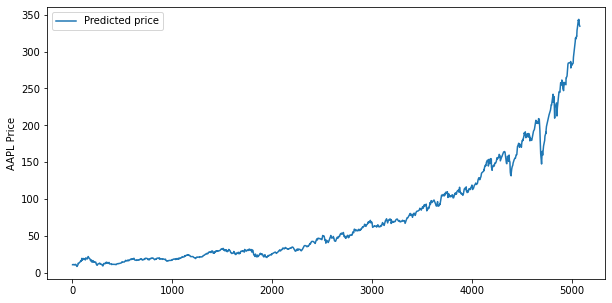

In [39]:
df['Predicted'].plot(figsize=(10,5))   
plt.legend(['Predicted price'])  
plt.ylabel("AAPL Price")  
plt.show()

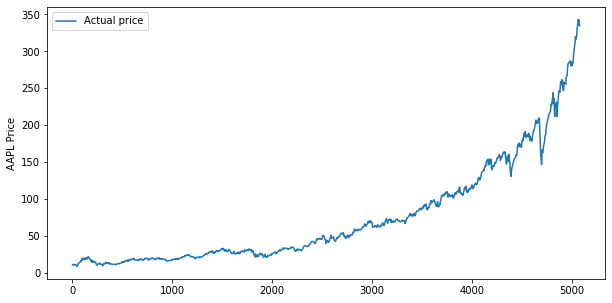

In [40]:
df['Close'].plot(figsize=(10,5))   
plt.legend(['Actual price'])  
plt.ylabel("AAPL Price")  
plt.show()